In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score, roc_auc_score, roc_curve, auc, plot_confusion_matrix, precision_recall_curve
from matplotlib.legend_handler import HandlerLine2D

In [2]:
df = pd.read_csv('Data/preprocessed_diabetes.csv')

In [3]:
df

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,...,metformin_1,repaglinide_1,glipizide_1,glyburide_1,pioglitazone_1,rosiglitazone_1,acarbose_1,insulin_1,change_1,diabetesMed_1
0,1,41,0,1,0,0,0,1,-99,-99,...,0,0,0,0,0,0,0,0,0,0
1,3,59,0,18,0,0,0,9,-99,-99,...,0,0,0,0,0,0,0,1,1,1
2,2,11,5,13,2,0,1,6,-99,-99,...,0,0,1,0,0,0,0,0,0,1
3,2,44,1,16,0,0,0,7,-99,-99,...,0,0,0,0,0,0,0,1,1,1
4,1,51,0,8,0,0,0,5,-99,-99,...,0,0,1,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97083,3,51,0,16,0,0,0,9,-99,2,...,1,0,0,0,0,0,0,1,1,1
97084,5,33,3,18,0,0,1,9,-99,-99,...,0,0,0,0,0,0,0,1,0,1
97085,1,53,0,9,1,0,0,13,-99,-99,...,1,0,0,0,0,0,0,1,1,1
97086,10,45,2,21,0,0,1,9,-99,-99,...,0,0,1,0,1,0,0,1,1,1


In [4]:
X = df.loc[:, df.columns!= 'readmitted']
y = df.readmitted

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
y_test.shape

(24272,)

In [7]:
zeros= np.zeros((24272,))
ones = np.ones((24272,))
rand = np.random.randint(2, size=(24272,))

In [8]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, zeros)))
print("Precision is {0:.2f}".format(precision_score(y_test, zeros)))
print("Recall is {0:.2f}".format(recall_score(y_test, zeros)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test, zeros)))

Accuracy is 0.53
Precision is 0.00
Recall is 0.00
AUC is 0.50


C:\Users\Donghyeok\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, ones)))
print("Precision is {0:.2f}".format(precision_score(y_test, ones)))
print("Recall is {0:.2f}".format(recall_score(y_test, ones)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test, ones)))

Accuracy is 0.47
Precision is 0.47
Recall is 1.00
AUC is 0.50


In [10]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rand)))
print("Precision is {0:.2f}".format(precision_score(y_test, rand)))
print("Recall is {0:.2f}".format(recall_score(y_test, rand)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test, rand)))

Accuracy is 0.51
Precision is 0.48
Recall is 0.51
AUC is 0.51


In [11]:
plt.style.use('fivethirtyeight')

In [12]:
%%time
#SGD
sgd = SGDClassifier(loss='hinge', random_state=42)
sgd.fit(X_train, y_train)

Wall time: 11.8 s


SGDClassifier(random_state=42)

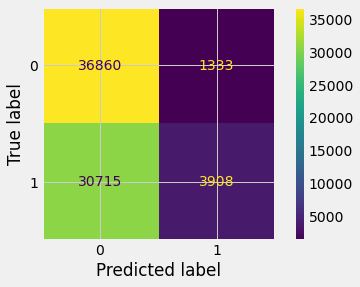

In [13]:
plot_confusion_matrix(sgd, X_train, y_train)

In [14]:
%%time
#Decision Tree
dtree = DecisionTreeClassifier(random_state=42, max_depth=15)
dtree.fit(X_train, y_train)

Wall time: 1.37 s


DecisionTreeClassifier(max_depth=15, random_state=42)

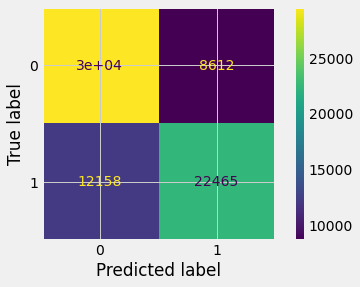

In [15]:
plot_confusion_matrix(dtree, X_train, y_train)

In [16]:
#KNN Elbow Method
error_rate = []
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

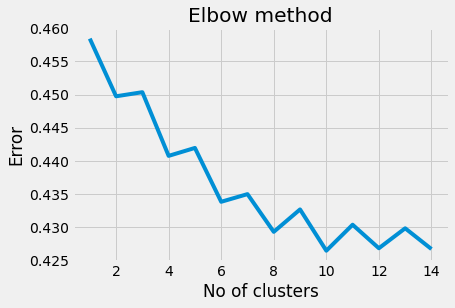

In [17]:
plt.plot(range(1, 15), error_rate)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()
plt.savefig('Figures/KNN_elbow_method.png')

In [18]:
%%time
#KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

Wall time: 8.07 s


KNeighborsClassifier(n_neighbors=10)

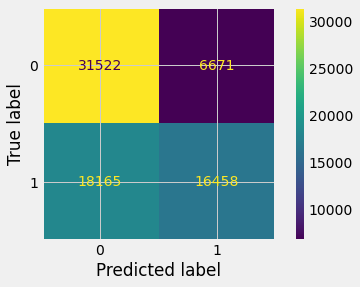

In [19]:
plot_confusion_matrix(knn, X_train, y_train)

In [20]:
%%time
#Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

Wall time: 166 ms


GaussianNB()

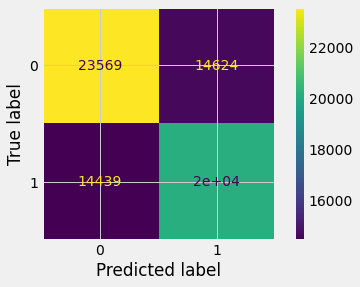

In [21]:
plot_confusion_matrix(nb, X_train, y_train)

In [22]:
%%time
#Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

Wall time: 168 ms


GaussianNB()

In [23]:
%%time
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

Wall time: 2.09 s


C:\Users\Donghyeok\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

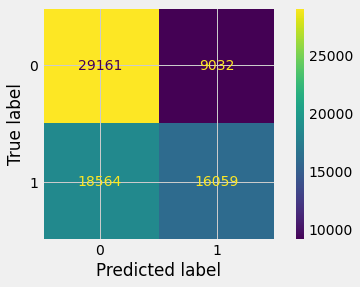

In [24]:
plot_confusion_matrix(lr, X_train, y_train)

In [25]:
rf = RandomForestClassifier(random_state=42)

In [26]:
n_estimators = [32, 64, 128, 256, 512, 1024, 2048]

train_results = []
test_results = []
for estimator in n_estimators:
    rf= RandomForestClassifier(max_depth = 8, n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

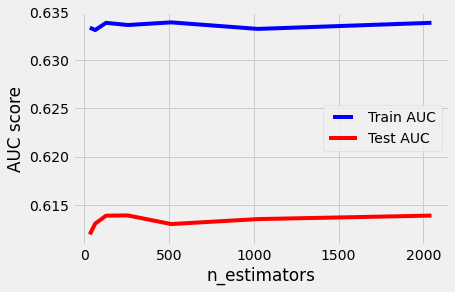

In [27]:
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [28]:
n_estimators = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

train_results = []
test_results = []
for estimator in n_estimators:
    rf= RandomForestClassifier(max_depth = 8, n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

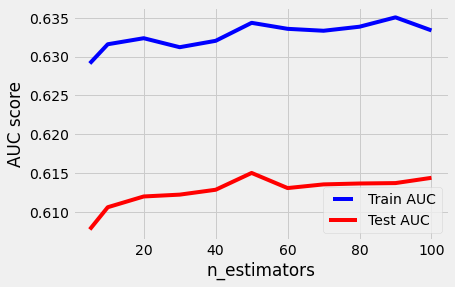

In [29]:
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [30]:
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

train_results = []
test_results = []
for depth in max_depth:
    rf= RandomForestClassifier(max_depth=depth, n_estimators = 20, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

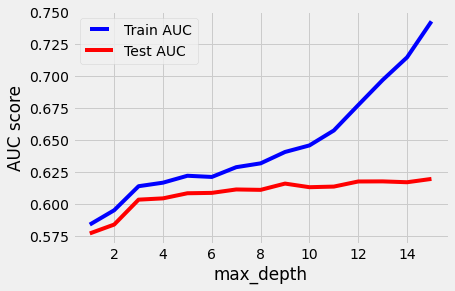

In [31]:
line1, = plt.plot(max_depth, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depth, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.show()
plt.savefig('Figures/RF_max_depth.png')

In [32]:
%%time
rf= RandomForestClassifier(max_depth = 8, n_estimators=20, n_jobs=-1)
rf.fit(X_train, y_train)

Wall time: 685 ms


RandomForestClassifier(max_depth=8, n_estimators=20, n_jobs=-1)

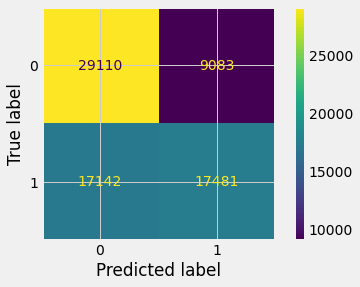

In [33]:
plot_confusion_matrix(rf, X_train, y_train)

In [34]:
features = X.columns
importance = rf.feature_importances_

In [35]:
features = features[:15]
importance = importance[:15]

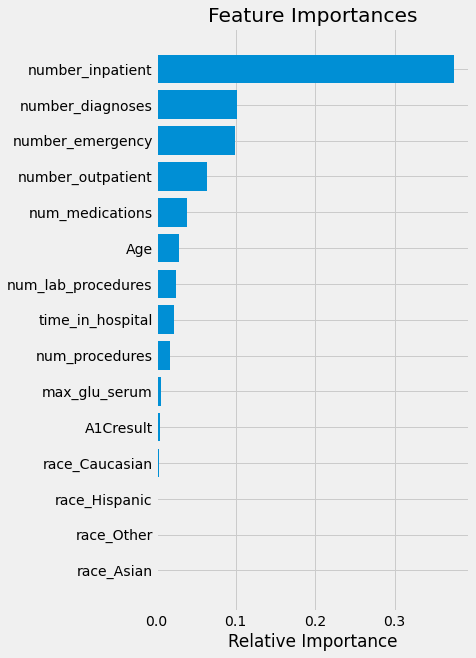

In [36]:
indices = np.argsort(importance)
plt.figure(figsize=(5,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [37]:
parameters = {
    'max_depth': range (2, 20, 2),
    'n_estimators': range(20, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
    }

estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
    )

gs = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
    )


In [38]:
%%time
gs.fit(X_train, y_train)
y_predxgb = gs.predict(X_test)

gs.best_params_

In [39]:
xgb = xgb.XGBClassifier(objective= 'binary:logistic', seed=42, 
                  learning_rate=0.1, max_depth=4, n_estimators=180)

#makes sense because we want a simple model

In [40]:
%%time
xgb.fit(X_train, y_train)

Wall time: 40.9 s


XGBClassifier(max_depth=4, n_estimators=180, seed=42)

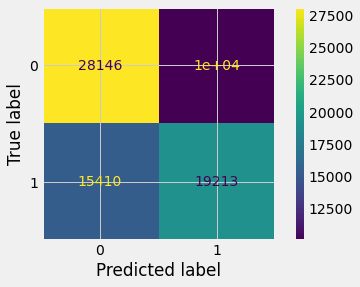

In [41]:
plot_confusion_matrix(xgb, X_train, y_train)

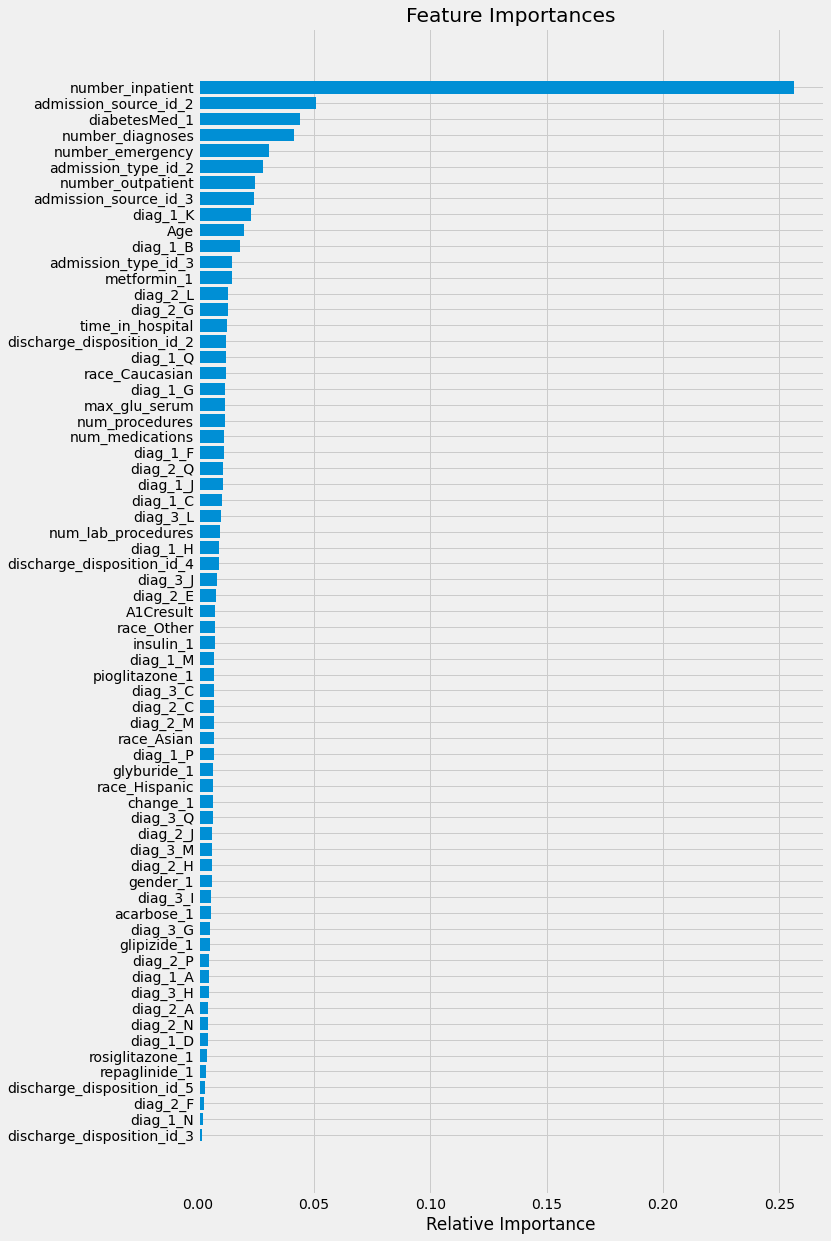

<Figure size 432x288 with 0 Axes>

In [42]:
features = X.columns
importance = xgb.feature_importances_
indices = np.argsort(importance)
plt.figure(figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

plt.savefig('Feature_Importances.png')

In [43]:
features = X.columns
importance = xgb.feature_importances_

In [44]:
features = features[:15]
importance = importance[:15]

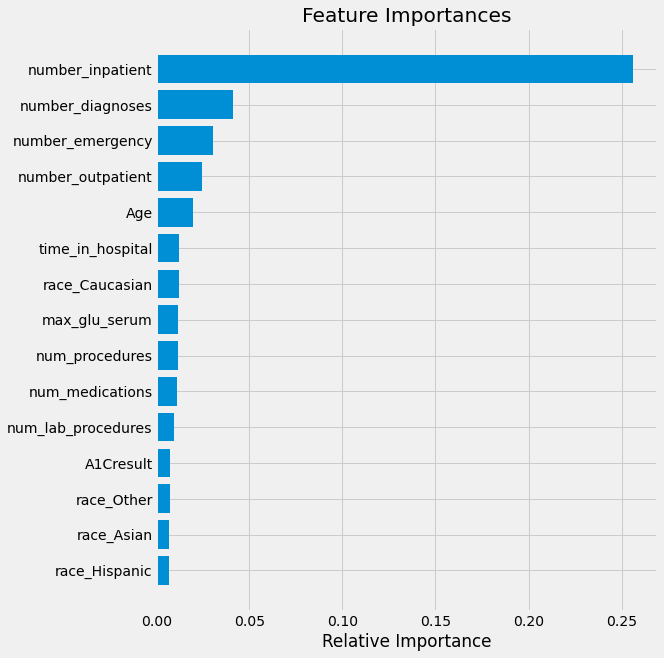

In [45]:
indices = np.argsort(importance)
plt.figure(figsize=(8,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.savefig('Figures/Feature_Importances.png', bbox_inches='tight')
plt.show()

In [46]:
models = [sgd, dtree, knn, nb, lr, rf, xgb]
model_table = pd.DataFrame(columns=['model','cvs','acc','prec',
                                    'recall','auc_test','auc','fpr','tpr'])

SGDClassifier
DecisionTreeClassifier
KNeighborsClassifier
GaussianNB
LogisticRegression
RandomForestClassifier
XGBClassifier


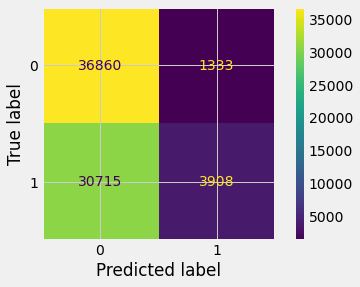

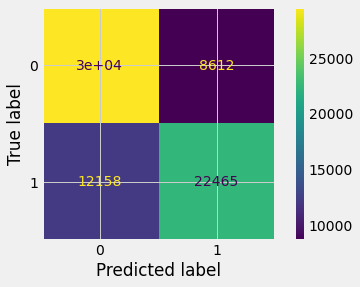

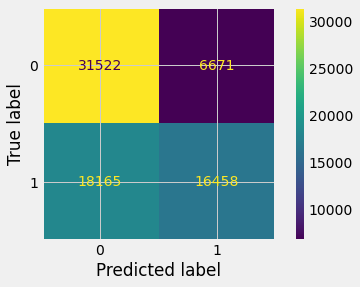

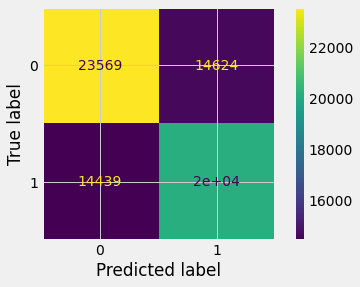

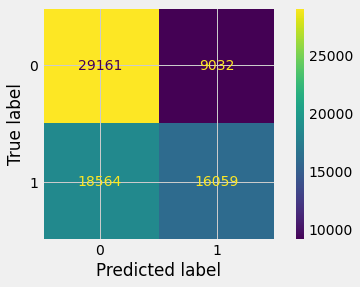

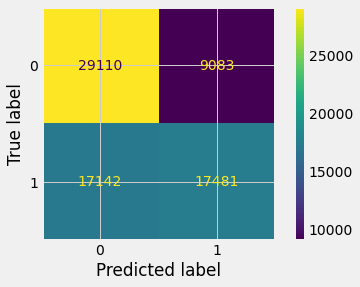

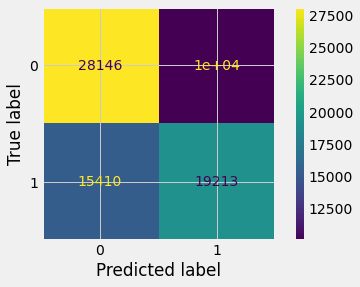

In [47]:
model_attr = []
for model in models:
    y_trainpred = model.predict(X_train)
    y_pred= model.predict(X_test)
    
    auc_test = roc_auc_score(y_train, y_trainpred)
    
    model_name = model.__class__.__name__
    plot_confusion_matrix(model, X_train, y_train)
    print(model_name)
    
    #cross_val = np.mean(cross_val_score(model, X_train, y_train, cv=25))
    accuracy = accuracy_score(y_test, y_pred)
    precision_plot, recall_plot, _ = precision_recall_curve(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    avg_prec = average_precision_score(y_test,y_pred)
    auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    model_attr.append({
                        'model': model_name,
                        'cvs': cross_val,
                        'acc': accuracy,
                        'auc_test': auc_test,
                        'auc': auc,
                        'ap': avg_prec,
                        'prec': precision,
                        'recall': recall,
                        'fpr': fpr,
                        'tpr': tpr,
                        'prec_plot': precision_plot,
                        'recall_plot': recall_plot 
                        })

In [48]:
model_table = pd.DataFrame(model_attr)
model_table.set_index('model', inplace=True)
model_table

,acc,auc_test,auc,ap,prec,recall,fpr,tpr,prec_plot,recall_plot
model,,,,,,,,,,
SGDClassifier,0.557103,0.538986,0.533289,0.496999,0.707118,0.105759,"[0.0, 0.03918201685919451, 1.0]","[0.0, 0.10575916230366492, 1.0]","[0.47214897824653923, 0.7071178529754959, 1.0]","[1.0, 0.10575916230366492, 0.0]"
DecisionTreeClassifier,0.597396,0.711680,0.593671,0.529629,0.581263,0.526789,"[0.0, 0.3394473930689978, 1.0]","[0.0, 0.5267888307155323, 1.0]","[0.47214897824653923, 0.581263238975544, 1.0]","[1.0, 0.5267888307155323, 0.0]"
KNeighborsClassifier,0.573542,0.650342,0.563271,0.510436,0.573201,0.378883,"[0.0, 0.25234155479238213, 1.0]","[0.0, 0.37888307155322865, 1.0]","[0.47214897824653923, 0.5732013201320132, 1.0]","[1.0, 0.37888307155322865, 0.0]"
GaussianNB,0.591917,0.600034,0.591082,0.526644,0.566744,0.576091,"[0.0, 0.393927567905089, 1.0]","[0.0, 0.5760907504363002, 1.0]","[0.47214897824653923, 0.5667439265172977, 1.0]","[1.0, 0.5760907504363002, 0.0]"
LogisticRegression,0.610827,0.613671,0.602328,0.539279,0.621413,0.449738,"[0.0, 0.2450827349359975, 1.0]","[0.0, 0.44973821989528795, 1.0]","[0.47214897824653923, 0.6214130696889317, 1.0]","[1.0, 0.44973821989528795, 0.0]"
RandomForestClassifier,0.619397,0.633539,0.612273,0.546242,0.625113,0.484380,"[0.0, 0.259834530128005, 1.0]","[0.0, 0.48438045375218153, 1.0]","[0.47214897824653923, 0.6251126126126126, 1.0]","[1.0, 0.48438045375218153, 0.0]"
XGBClassifier,0.628832,0.645931,0.623742,0.553885,0.625679,0.532373,"[0.0, 0.2848891664064939, 1.0]","[0.0, 0.5323734729493892, 1.0]","[0.47214897824653923, 0.6256794174956415, 1.0]","[1.0, 0.5323734729493892, 0.0]"


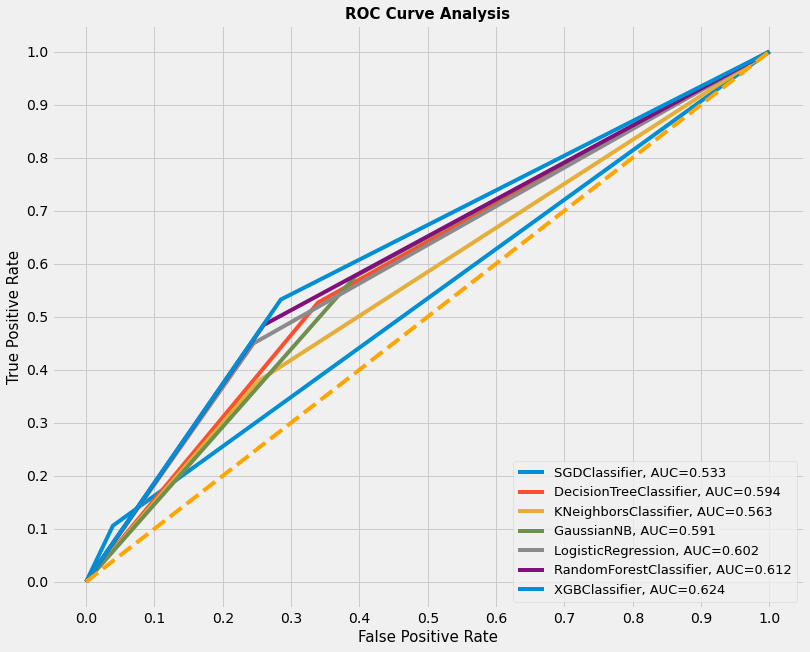

In [49]:
fig = plt.figure(figsize=(12,10))

for i in model_table.index:
    plt.plot(model_table.loc[i]['fpr'], 
             model_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, model_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.savefig('Figures/ROC_Curve_Analysis.png')
plt.show()

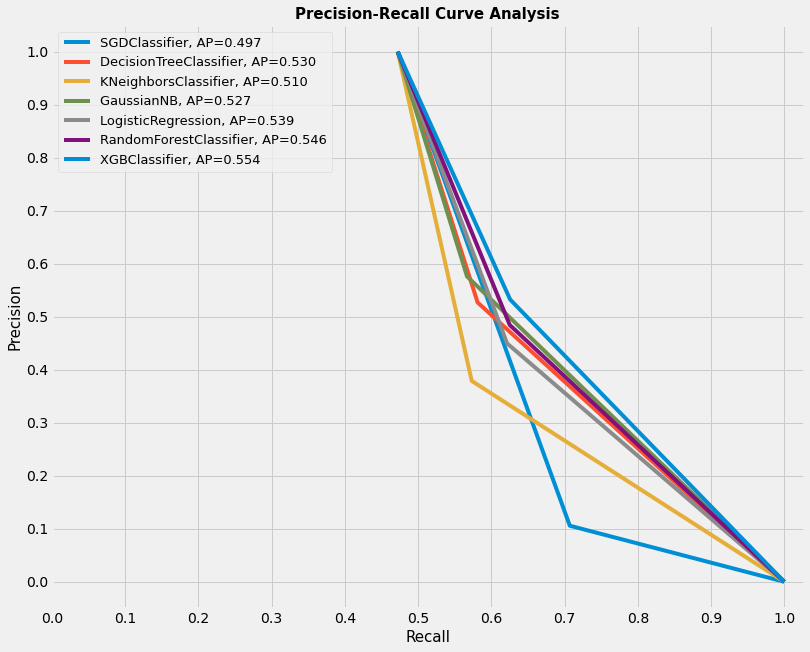

In [50]:
fig = plt.figure(figsize=(12,10))

for i in model_table.index:
    plt.plot(model_table.loc[i]['prec_plot'], 
             model_table.loc[i]['recall_plot'], 
             label="{}, AP={:.3f}".format(i, model_table.loc[i]['ap']))

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.title('Precision-Recall Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='upper left')

plt.savefig('Figures/Precision-Recall_Curve_Analysis.png')
plt.show()

In [51]:
model_table.iloc[:,:7]

,acc,auc_test,auc,ap,prec,recall,fpr
model,,,,,,,
SGDClassifier,0.557103,0.538986,0.533289,0.496999,0.707118,0.105759,"[0.0, 0.03918201685919451, 1.0]"
DecisionTreeClassifier,0.597396,0.711680,0.593671,0.529629,0.581263,0.526789,"[0.0, 0.3394473930689978, 1.0]"
KNeighborsClassifier,0.573542,0.650342,0.563271,0.510436,0.573201,0.378883,"[0.0, 0.25234155479238213, 1.0]"
GaussianNB,0.591917,0.600034,0.591082,0.526644,0.566744,0.576091,"[0.0, 0.393927567905089, 1.0]"
LogisticRegression,0.610827,0.613671,0.602328,0.539279,0.621413,0.449738,"[0.0, 0.2450827349359975, 1.0]"
RandomForestClassifier,0.619397,0.633539,0.612273,0.546242,0.625113,0.484380,"[0.0, 0.259834530128005, 1.0]"
XGBClassifier,0.628832,0.645931,0.623742,0.553885,0.625679,0.532373,"[0.0, 0.2848891664064939, 1.0]"
